# Some simple viral infection simulations
I've been seeing a lot of "flatten the curve" charts online, without any scale on the time axis. I was curious to try to replicate their analysis, so I've written a simple simulation.

For this simulation, I use a simple model for viral infections in the US. At a given time, a person can be either infected with the virus, previously infected with the virus, or uninfected. Someone who is previously infected cannot be infected again with the virus. We let $p$ be the total population, $i_d$ be the total number of infected people at day $d$, and $r_d$ be the total number of people recovered from the virus at day $d$. If $t_{r}$ is the average amount of time it takes someone to recover from the virus, then every day $\frac{i_d}{t_r}$ people recover from the virus. We let $\rho$ be the average number of people an infected person infects in a day. In order to simulate people becoming immune, we scale the number of people an infected person can infect by the proportion of the population still susceptible to the virus. So, on a given day, $\frac{p - i_d - r_d}{p} \rho i_d$ new people get infected by the virus. Putting it all together, we have $$i_{d+1} = (1-\frac{1}{t_r})i_d + \frac{p - i_d - r_d}{p}\rho i_d$$
$$r_{d+1} = r_d + \frac{i_d}{r_t}$$

The population is set to 300,000,000. Estimates say that a person infects another person with coronavirus every five days. We also assume that it takes about a week to recover from the virus (this is conservative, I've mostly seen higher numbers online). We The goal of social distancing is to reduce this rate. In this notebook, I try to find the rate needed to not overload the health system. In the US, there are 62,000 intensive care beds, and about ten percent percent of cases require hospitalization. 

In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def step(state, population=300000000, infection_rate=0.2, recovery_time=7):
  recovered, infected = state
  newRecovered = recovered + infected*(1/recovery_time)
  newInfected = (1-1/recovery_time)*infected + (population - infected - recovered)/population*infection_rate*infected
  return (newRecovered, newInfected)

def infection_range(init=(0,1000), steps=365, population=300000000, infection_rate=0.2, recovery_time=7):
    series = [init]
    for i in range(steps):
        series = series + [step(series[-1], population, infection_rate, recovery_time)]
    return [s[0] for s in series], [s[1] for s in series]

def show_infection(steps=365, population=300000000, infection_rate=0.2, recovery_time=7, hospitalization=0.1):
    recovered, infected = infection_range((0, 1000), steps, population, infection_rate, recovery_time)
    infected = np.array(infected)
    plt.figure()
    plt.plot(infected*hospitalization)
    plt.axhline(y=62000, color='r')
    #plt.plot(recovered)
    plt.show()

## Simulating without social distancing

Here, we plot hospital capacity with the number of people hospitalized at a given time without any social distancing. In this estimate, we run out of beds in about four months, and end up with a maximum of 14 million hospitalizations and about half of the total population having the virus at once. Fucking yikes. This is actually better than other estimates that put saturation at much much closer. 

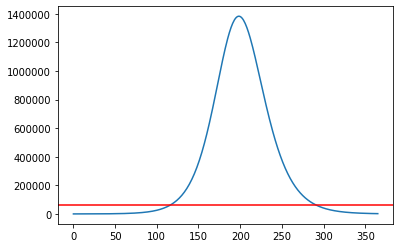

In [130]:
show_infection()

Here, we have a less optimistic scenario where the recovery time is two weeks and the doubling time is 3.5 days. Even more yikes

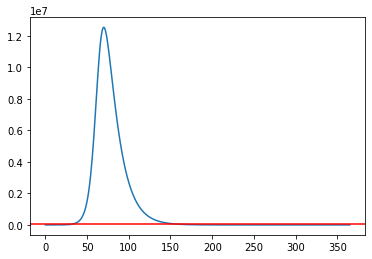

In [131]:
show_infection(recovery_time=14, infection_rate=1/3.5)

## Simulating some social distancing

If we reduce the infection rate from $0.2$ to $0.1525$ we don't overload the medical system. Peak infection occurs at around two years in. This means that in order for social distancing to work effectively, we have to quarantine ourselves for a very long time, effectively until a vaccine is developed. 

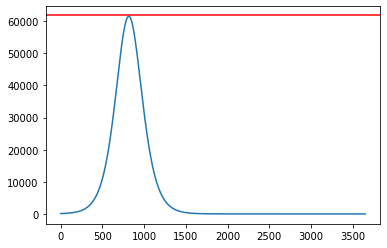

In [132]:
show_infection(infection_rate=0.1525, steps=3650)

However, this is very sensitive. If we increase the infection rate to $0.157$, we overshoot capacity by 2x. If we reduce it to $0.147$, we never get close to filling capacity. If we increase the recovery time to 10 days instead of seven days, our initial safe rate totally overshoots, and we have to reduce the infection rate even further. With a 10 day recovery time, it will take over three years to get past the worst of it

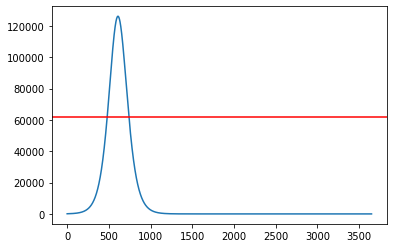

In [133]:
show_infection(infection_rate=0.157, steps=3650)

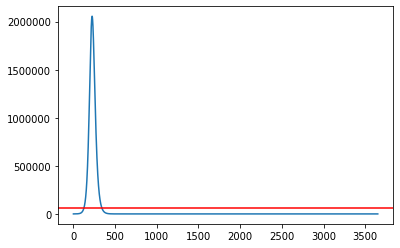

In [134]:
show_infection(infection_rate=0.1525, steps=3650, recovery_time=10)

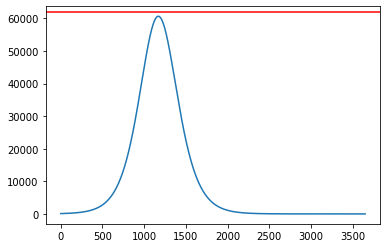

In [135]:
show_infection(infection_rate=0.1067, steps=3650, recovery_time=10)

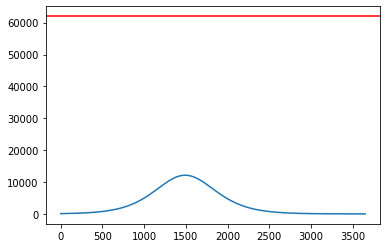

In [136]:
show_infection(infection_rate=0.147, steps=3650)

## Conclusions

Somewhat paradoxically, the better we socially isolate ourselves, the longer it takes for us to develop the immunity we need to actually return to normal life. While it might be effective to socially distance ourselves for a few weeks, I don't think anyone is really talking about what it will take for this to continue for months, or potentially years. While there are vaccines in development, I am a bit skeptical given that there are already multiple strains of the virus across the world.

Another alternative is that we eliminate the virus completely. This would entail that the infection rate is less than $\frac{1}{t_r}$. Effectively, this would mean that people are recovering at a rate higher than infection. However, I think a lot of sources basically say that this is not very likely unless a vaccine is developed. 

Also, something somewhat surprising to me was how sensitive this model was to both recovery times and infection rates. Even if we cannot find a vaccine, finding a cure that can stop the spread of the virus after a week of infection would be huge.